In [1]:
!nvidia-smi

Tue Jul 16 05:59:12 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    17W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
!git clone "https://github.com/convman/Multimodal-MOSEI.git"

Cloning into 'Multimodal-MOSEI'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 501 (delta 3), reused 0 (delta 0), pack-reused 466
Receiving objects: 100% (501/501), 901.82 MiB | 40.56 MiB/s, done.
Resolving deltas: 100% (178/178), done.
Checking out files: 100% (279/279), done.


In [3]:
cd Multimodal-MOSEI/

/content/Multimodal-MOSEI


In [4]:
ls

'cross modal'/   LICENSE                       sentiment/
 data/          'MOSEI baseline results.png'   SOF/
 iemocap/       'multimodal baselines'/       'unimodal baselines'/
'iemocap sdk'/   README.md


In [0]:
!chmod +x data/dataset_download.sh
!./data/dataset_download.sh

In [6]:
import pandas as pd
import numpy as np
import h5py
import torchvision
import torchsummary
from torch.autograd import Variable
import torch
from sklearn.decomposition import PCA
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from random import sample
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.utils.multiclass import unique_labels
import keras
import tensorflow as tf
from time import time
import scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from keras import layers
from google.colab import files	
from keras.models import load_model
from keras.models import Model,Sequential,Model
from keras.layers import *
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from keras import callbacks
from keras.callbacks import *
%matplotlib inline

Using TensorFlow backend.


In [9]:
import pandas as pd
import numpy as np
import h5py

Test_labels_fear = pd.read_csv("mosi2uni_Test_labels_fear.csv",header=None)
Train_labels_fear = pd.read_csv("mosi2uni_Train_labels_fear.csv",header=None)

video_train = h5py.File("video_train.h5","r")
video_train = np.array(video_train.get('d1'))

video_test = h5py.File("video_test.h5","r")
video_test = np.array(video_test.get('d1'))

audio_train = h5py.File("audio_train.h5","r")
audio_train = np.array(audio_train.get('d1'))

audio_test = h5py.File("audio_test.h5","r")
audio_test = np.array(audio_test.get('d1'))

text_train = h5py.File("text_train_emb.h5","r")
text_train = np.array(text_train.get('d1'))

text_test = h5py.File("text_test_emb.h5","r")
text_test = np.array(text_test.get('d1'))


print(video_train.shape, text_train.shape, audio_train.shape)

(15290, 20, 35) (15290, 20, 300) (15290, 20, 74)


In [0]:
Train_audio = torch.from_numpy(audio_train).float().cuda()
Train_text = torch.from_numpy(text_train).float().cuda()

In [0]:
class Audio(nn.Module):
    def __init__(self):
        super(Audio,self).__init__()
        self.lstm1 = nn.LSTM(74,256,batch_first=True)
#         self.lstm2 = nn.LSTM(256,256,batch_first=True)
        self.lstm3 = nn.LSTM(256,128,batch_first=True)
#         self.lstm4 = nn.LSTM(128,128,batch_first=True)
        self.lstm5 = nn.LSTM(128,64,batch_first=True)
#         self.lstm6 = nn.LSTM(64,64,batch_first=True)
        self.lstm7 = nn.LSTM(64,32,batch_first=True)
#         self.lstm8 = nn.LSTM(32,32,batch_first=True)
        self.dense = nn.Linear(32,32)
    def forward(self,data):
        x,hc = self.lstm1(data)
#         x,hc = self.lstm2(x)
        x,hc = self.lstm3(x)
#         x,hc = self.lstm4(x)
        x,hc = self.lstm5(x)
#         x,hc = self.lstm6(x)
        x,hc = self.lstm7(x)
#         x,hc = self.lstm8(x)
        h,c = hc
        x = F.relu(self.dense(h.squeeze()))
        x = self.dense(x)
        return x

In [0]:
class Text(nn.Module):
    def __init__(self):
        super(Text,self).__init__()
        self.lstm1 = nn.LSTM(300,256,batch_first=True)
#         self.lstm2 = nn.LSTM(256,256,batch_first=True)
        self.lstm3 = nn.LSTM(256,128,batch_first=True)
#         self.lstm4 = nn.LSTM(128,128,batch_first=True)
        self.lstm5 = nn.LSTM(128,64,batch_first=True)
#         self.lstm6 = nn.LSTM(64,64,batch_first=True)
        self.lstm7 = nn.LSTM(64,32,batch_first=True)
#         self.lstm8 = nn.LSTM(32,32,batch_first=True)
        self.dense = nn.Linear(32,32)
    def forward(self,data):
        x,hc = self.lstm1(data)
#         x,hc = self.lstm2(x)
        x,hc = self.lstm3(x)
#         x,hc = self.lstm4(x)
        x,hc = self.lstm5(x)
#         x,hc = self.lstm6(x)
        x,hc = self.lstm7(x)
#         x,hc = self.lstm8(x)
        h,c = hc
        x = F.relu(self.dense(h.squeeze()))
        x = self.dense(x)
        return x


In [14]:
!nvidia-smi

Tue Jul 16 06:03:30 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    28W /  70W |   1207MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

iteration : 0  loss : 1.1282165050506592
iteration : 100  loss : 3.808736801147461e-05
iteration : 200  loss : 1.290440559387207e-05
iteration : 300  loss : -0.0001710653305053711
iteration : 400  loss : 8.344650268554688e-07
iteration : 500  loss : 0.0003046393394470215
iteration : 600  loss : -0.00015047192573547363
iteration : 700  loss : 0.00019869208335876465
iteration : 800  loss : 6.312131881713867e-05
iteration : 900  loss : 0.0001761019229888916


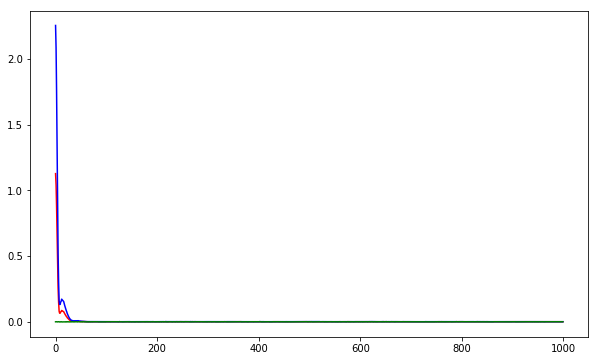

In [15]:
model_text = Text().cuda()
model_audio = Audio().cuda()

loss = []
cross_modal = []
diversity = []
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
distance = nn.CosineEmbeddingLoss()
iterations = 1000
optimizer_audio = torch.optim.SGD(model_audio.parameters(),weight_decay=0.0005,momentum=0.9,lr=0.01)
optimizer_text = torch.optim.SGD(model_text.parameters(),weight_decay=0.0005,momentum=0.9,lr=0.01)
# optimizer_video = torch.optim.SGD(model_video.parameters(),weight_decay=0.0005,momentum=0.9,lr=0.01)

for iteration in range(iterations):
    

    i,j = sample(range(0,15290),2)
    
    ai = torch.unsqueeze(Train_audio[i],0).cuda()
    aj = torch.unsqueeze(Train_audio[j],0).cuda()
    
    ti = torch.unsqueeze(Train_text[i],0).cuda()
    tj = torch.unsqueeze(Train_text[j],0).cuda()
    
    optimizer_audio.zero_grad()
    optimizer_text.zero_grad()
    
    xi = model_audio(ai)
    xj = model_audio(aj)
    
    yi = model_text(ti)
    yj = model_text(tj)
    
    xi = torch.unsqueeze(xi,0)
    xj = torch.unsqueeze(xj,0)
    
    yi = torch.unsqueeze(yi,0)
    yj = torch.unsqueeze(yj,0)

    
    cross_modal_loss1 = distance(xi,yi,torch.ones(1).cuda()) 
    cross_modal_loss2 = distance(xj,yj,torch.ones(1).cuda())
    diversity_loss1 = -distance(xi,xj,torch.ones(1).cuda()) 
    diversity_loss2 = -distance(yi,yj,torch.ones(1).cuda())
    
    
    total_loss = 0.5*(cross_modal_loss1 + cross_modal_loss2 + diversity_loss1 + diversity_loss2)
    loss.append(total_loss.item())
    cross_modal.append(cross_modal_loss1.item()+cross_modal_loss2.item())
    diversity.append(diversity_loss1.item()+diversity_loss2.item())
    
    total_loss.backward()
    optimizer_audio.step()
    optimizer_text.step()
    
    if(iteration%100 == 0):
        print("iteration :",iteration," loss :",total_loss.item())
    
#     del ai,aj,ti,tj,xi,xj,yi,yj
#     del total_loss,cross_modal_loss1,cross_modal_loss2,diversity_loss1,diversity_loss2
#     torch.cuda.empty_cache()
    
    
    
plt.plot(loss,'r',cross_modal,'b',diversity,'g')
plt.show()

In [16]:
!nvidia-smi

Tue Jul 16 06:04:57 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    29W /  70W |   1251MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

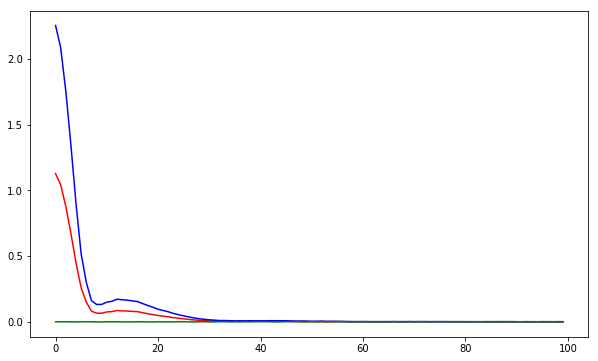

In [17]:
plt.plot(loss[:100],'r',cross_modal[:100],'b',diversity[:100],'g')
plt.show()

In [0]:
class classifier(nn.Module):
    def __init__(self):
        super(classifier,self).__init__()
        self.dense1 = nn.Linear(32,32)
        self.dense2 = nn.Linear(32,1)
    def forward(self,data):
        x = F.relu(self.dense1(data))
#         x = F.relu(self.dense1(x))
#         x = F.relu(self.dense1(x))
        x = torch.sigmoid(self.dense2(x))
        return x

In [0]:
Train_labels_fear = torch.from_numpy(np.array(Train_labels_fear)).float().cuda()
Test_labels_fear = torch.from_numpy(np.array(Test_labels_fear)).float().cuda()
Test_audio = torch.from_numpy(audio_test).float().cuda()
Test_text = torch.from_numpy(text_test).float().cuda()

In [20]:
!nvidia-smi

Tue Jul 16 06:06:05 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    29W /  70W |   1391MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
def accuracy(prediction,label):
    prediction = (prediction>0.5)
    acc = torch.sum(prediction==label.byte())
    return 100*(acc.float()/label.size()[0]).item()

In [27]:
model_classifier = classifier().cuda()
w=list(model_classifier.parameters())
print(model_audio(Test_audio))
prediction = model_classifier(model_audio(Test_audio))
print(accuracy(prediction, Test_labels_fear))

tensor([[-0.0229,  0.0307, -0.2595,  ...,  0.4247,  0.0066,  0.0080],
        [-0.0228,  0.0304, -0.2600,  ...,  0.4251,  0.0070,  0.0081],
        [-0.0226,  0.0315, -0.2597,  ...,  0.4254,  0.0078,  0.0081],
        ...,
        [-0.0184,  0.0284, -0.2469,  ...,  0.4102, -0.0048, -0.0008],
        [-0.0223,  0.0314, -0.2579,  ...,  0.4211,  0.0059,  0.0063],
        [-0.0228,  0.0309, -0.2605,  ...,  0.4253,  0.0080,  0.0082]],
       device='cuda:0', grad_fn=<AddmmBackward>)
93.1291401386261


In [30]:
model_classifier = classifier().cuda()
w=list(model_classifier.parameters())
print(model_text(Test_text))
prediction = model_classifier(model_text(Test_text))
print(accuracy(prediction, Test_labels_fear))

tensor([[-0.0200,  0.0297, -0.2439,  ...,  0.4041,  0.0040,  0.0046],
        [-0.0205,  0.0294, -0.2452,  ...,  0.4035,  0.0027,  0.0046],
        [-0.0202,  0.0290, -0.2456,  ...,  0.4033,  0.0027,  0.0045],
        ...,
        [-0.0204,  0.0283, -0.2446,  ...,  0.4033,  0.0034,  0.0055],
        [-0.0205,  0.0289, -0.2460,  ...,  0.4031,  0.0028,  0.0042],
        [-0.0199,  0.0293, -0.2453,  ...,  0.4033,  0.0024,  0.0046]],
       device='cuda:0', grad_fn=<AddmmBackward>)
93.1291401386261
